In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def gen_G(f_fail, fs, N, Λ=10, D_lambda=1/16):
    K=int(Λ/D_lambda)
    Ts=1/fs
    λs=np.arange(0,Λ,D_lambda)
    G=np.zeros((K,N),dtype=np.complex128)
    for k in range(K):
        G[k,:]=np.exp(-1j*2*np.pi*D_lambda*k*Ts*np.cumsum(f_fail))
    return G

def calc_Xlambda(G, Sx):
    return (1/Sx.shape[0])*np.dot(G, Sx)

def matricial_IGD(f_fail, fs, Sx_env, Λ=10, D_lambda=1/16):
    G=gen_G(f_fail, fs, Sx_env.shape[0], Λ, D_lambda)
    Sx_env=Sx_env-np.mean(Sx_env)
    Sx_env_analytic=signal.hilbert(Sx_env)
    X_lambda = calc_Xlambda(G, Sx_env_analytic)
    return X_lambda

In [3]:
n1=pd.read_csv("data/Harmonic_n1_W1R_A001_VEL020_fs1000.csv")
n2=pd.read_csv("data/Harmonic_n2_W1R_A001_VEL020_fs1000.csv")
n3=pd.read_csv("data/Harmonic_n3_W1R_A001_VEL020_fs1000.csv")

Sx=(n1,n2,n3)
Sx[0].tail()

,t [s],az NO FLAT [m/s2],az WITH FLAT [m/s2]
8996,32.666,-9.799010,-9.653204
8997,32.667,-9.803764,-9.650483
8998,32.668,-9.798660,-9.654696
8999,32.669,-9.803680,-9.652433
9000,32.670,-9.816648,-9.695604


##### Index 0 : Eccentricity
##### Index 1 : Ovalization
##### Index 2 : Triangularization

In [4]:
t=[]
Sx_no_defect=[]
Sx_defect=[]
for index in range(3):
    t.append(Sx[index]['t [s]'].to_numpy())
    az_no_flat = Sx[index]['az NO FLAT [m/s2]'].to_numpy()
    az_with_flat = Sx[index]['az WITH FLAT [m/s2]'].to_numpy()

    az_no_flat = az_no_flat - np.mean(az_no_flat)
    az_with_flat = az_with_flat - np.mean(az_with_flat)

    Sx_no_defect.append(az_no_flat)
    Sx_defect.append(az_with_flat)
    
fs=1e3
#fs=1/np.mean(np.diff(t))
print('Sampling freq:',fs,'Hz')
N=len(t[0])
n=np.arange(N)
print('Number of samples:', N)
print('Initial time:',t[0],'s')

r=0.46
print('Radius:',r,'m')

v=20e3/3600
print('Lineal velocity:',v,'m/s')

fr=v/(2*np.pi*r)
f_fail=fr*np.ones((N,1))
print('Rotational freq:',fr,'Hz')

Sampling freq: 1000.0 Hz
Number of samples: 9001
Initial time: [23.67  23.671 23.672 ... 32.668 32.669 32.67 ] s
Radius: 0.46 m
Lineal velocity: 5.555555555555555 m/s
Rotational freq: 1.9221611484528422 Hz


In [5]:
print(np.array_equal(Sx_no_defect[0], Sx_no_defect[1])) # Check if the arrays are equal
print(np.array_equal(Sx_no_defect[0], Sx_no_defect[2]))

True
True


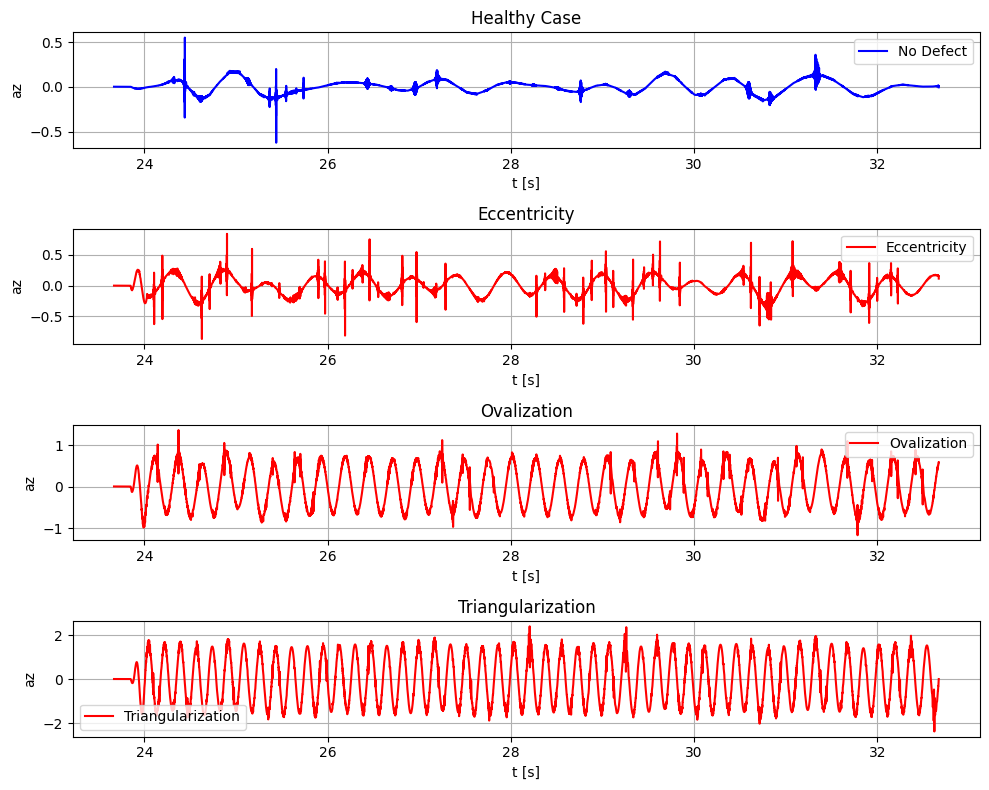

In [6]:
# Crear los subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

axs[0].plot(t[0], Sx_no_defect[0], label='No Defect', color='b')
axs[0].set_title('Healthy Case')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('az')
axs[0].grid(True)
axs[0].legend()

# Segundo subplot: az_no_flat_array
axs[1].plot(t[0],Sx_defect[0], label='Eccentricity', color='r')
axs[1].set_title('Eccentricity')
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel('az')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t[1],Sx_defect[1], label='Ovalization', color='r')
axs[2].set_title('Ovalization')
axs[2].set_xlabel('t [s]')
axs[2].set_ylabel('az')
axs[2].grid(True)
axs[2].legend()

axs[3].plot(t[2],Sx_defect[2], label='Triangularization', color='r')
axs[3].set_title('Triangularization')
axs[3].set_xlabel('t [s]')
axs[3].set_ylabel('az')
axs[3].grid(True)
axs[3].legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

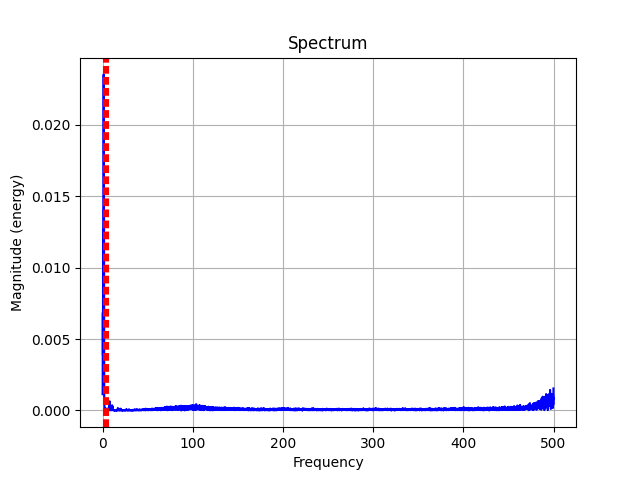

Max freq: 1.2220864348405733


In [77]:
plt.close('all')
%matplotlib widget 
plt.title("Spectrum")
spectrum=plt.magnitude_spectrum(Sx_no_defect[0], Fs=fs, color='blue')
for i in range(1, 4):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
plt.show()

print('Max freq:',spectrum[1][np.argmax(spectrum[0])])

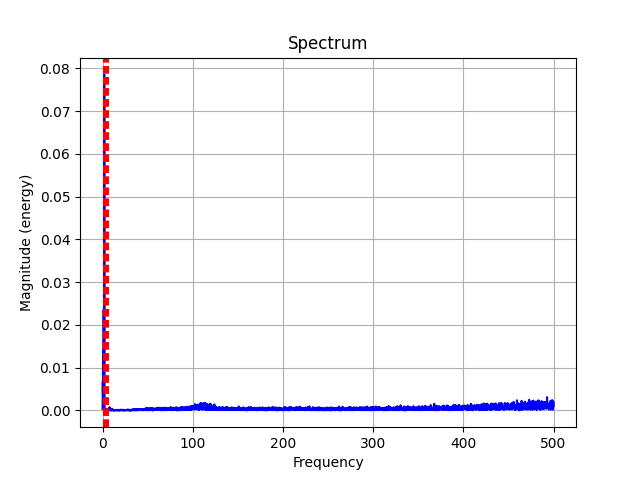

Max freq: 1.8886790356627043


In [83]:
plt.close('all')
%matplotlib widget 
plt.title("Spectrum")
spectrum=plt.magnitude_spectrum(Sx_defect[0], Fs=fs, color='blue')
for i in range(1, 4):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
plt.show()

print('Max freq:',spectrum[1][np.argmax(spectrum[0])])

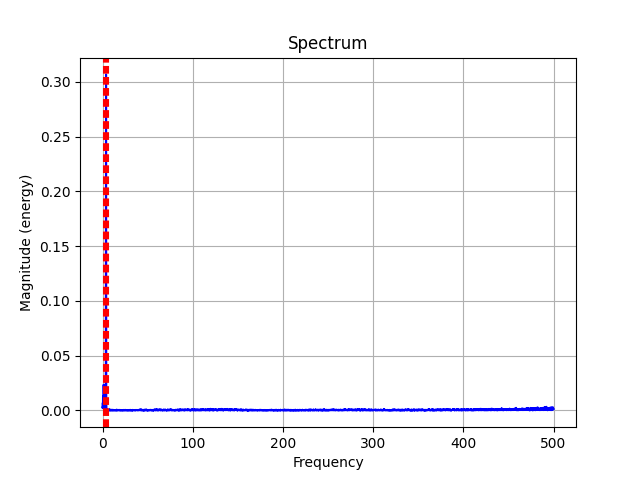

Max freq: 3.8884568381290974


In [84]:
plt.close('all')
%matplotlib widget 
plt.title("Spectrum")
spectrum=plt.magnitude_spectrum(Sx_defect[1], Fs=fs, color='blue')
for i in range(1, 4):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
plt.show()

print('Max freq:',spectrum[1][np.argmax(spectrum[0])])

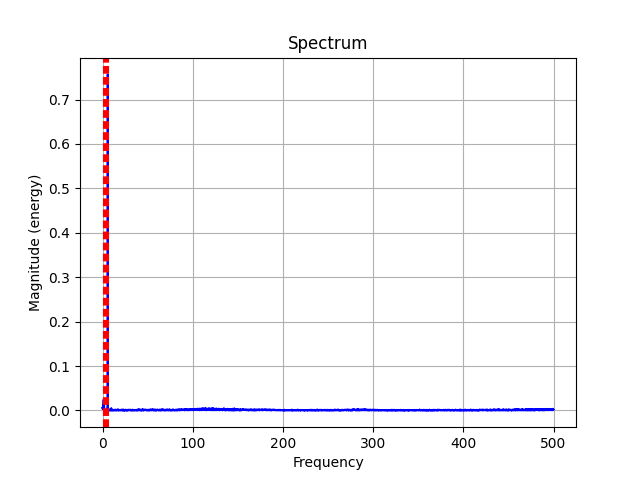

Max freq: 5.777135873791802


In [85]:
plt.close('all')
%matplotlib widget 
plt.title("Spectrum")
spectrum=plt.magnitude_spectrum(Sx_defect[2], Fs=fs, color='blue')
for i in range(1, 4):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
plt.show()

print('Max freq:',spectrum[1][np.argmax(spectrum[0])])

In [86]:
Λ=5
D_lambda=1/64

X_lambda_0 = matricial_IGD(f_fail, fs, Sx_defect[0],Λ,D_lambda)
X_lambda_1 = matricial_IGD(f_fail, fs, Sx_defect[1],Λ,D_lambda)
X_lambda_2 = matricial_IGD(f_fail, fs, Sx_defect[2],Λ,D_lambda)
X_lambda_no = matricial_IGD(f_fail, fs, Sx_no_defect[0],Λ,D_lambda)

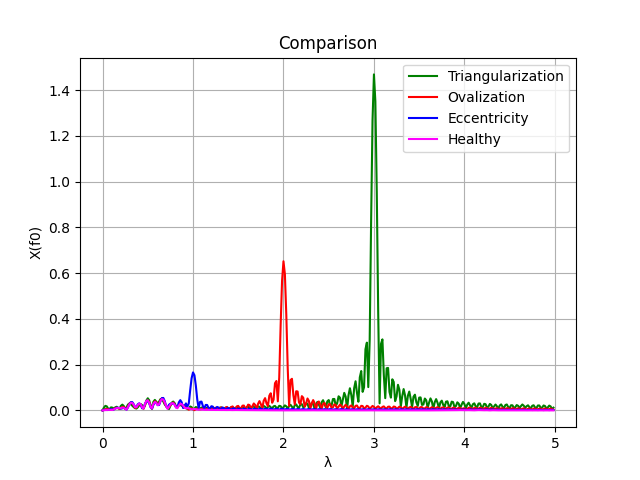

In [87]:
plt.close('all')
%matplotlib widget

λs=np.arange(0,Λ,D_lambda)


plt.plot(λs,np.abs(X_lambda_2),color='green',label='Triangularization')
plt.plot(λs,np.abs(X_lambda_1),color='red',label='Ovalization')
plt.plot(λs,np.abs(X_lambda_0),color='blue',label='Eccentricity')
plt.plot(λs,np.abs(X_lambda_no),color='magenta',label='Healthy')
plt.legend()
plt.title("Comparison") 
plt.xlabel('λ')
plt.ylabel('X(f0)')
plt.grid(True)

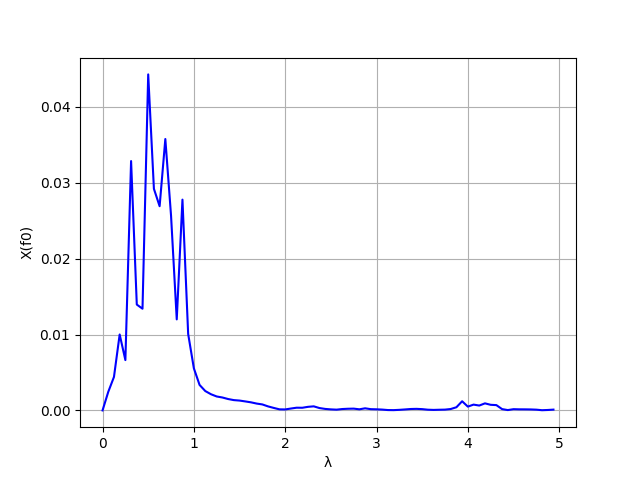

In [54]:


plt.close('all')
%matplotlib widget

λs=np.arange(0,5,1/16)


plt.xlabel('λ')
plt.ylabel('X(f0)')
plt.grid(True)